Homework 1

Consider the following maximization problem.

max-x x1+1/4x2

1/2x1+x2 ≤ 1

2x1+x2 ≤ 2

x1≥0,x2≥0


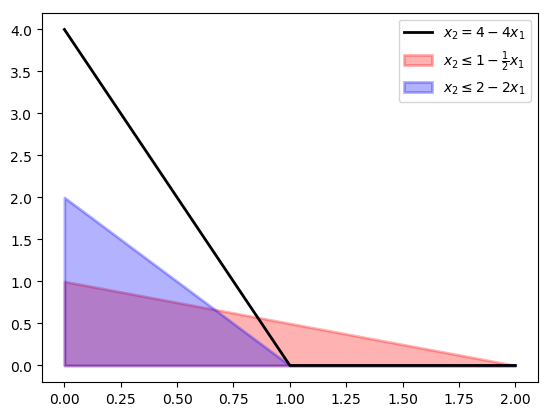

PyObject <matplotlib.legend.Legend object at 0x120476890>

In [1]:
#A. Guess the solution. Plot the constraints and the objective function. Justify your guess.
#The solution would be on the equation x2 = 4 - 4x1, indicated by the black line below
#Hence the solution would be on x1 = 1, x2 = 0

using PyPlot

x1 = collect(0:0.1:2)
x2a = 1-0.5*x1
x2b = ifelse.(2-2*x1.>=0,2-2*x1,0)
x2c = ifelse.(4-4*x1.>=0,4-4*x1,0)


fig, ax = subplots()
ax[:fill_between](x1,x2a,color="red",linewidth=2,label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:fill_between](x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:plot](x1,x2c,color="black",linewidth=2,label=L"x_{2} = 4 - 4x_{1}",alpha=1)
ax[:legend](loc="upper right")

In [2]:
#B. Using Julia define and solve the above problem 'as is'.
using JuMP
using GLPKMathProgInterface

myModel = Model(solver=GLPKSolverLP())
@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)
@constraint(myModel, 0.5*x1 + x2 <= 1)
@constraint(myModel, 2*x1 + x2 <= 2)
@objective(myModel, Max, x1+ 0.25*x2)
myModel

Maximization problem with:
 * 2 linear constraints
 * 2 variables
Solver is GLPKInterfaceLP

In [3]:
@time begin
    status = solve(myModel)
end
println("Objective value: ", getobjectivevalue(myModel))
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))

  2.133158 seconds (1.45 M allocations: 76.129 MiB, 1.27% gc time)
Objective value: 1.0
x1 = 1.0
x2 = 0.0


#C. Rewrite it in the standard form.

Max-x x1 + 1/4 x2

1/2x1 + x2 + x3 = 1

2x1 + x2 + x4 = 2

x1>=0; x2>=0; x3>=0; x4>=0


In [19]:
#D. Using Julia define and solve the above problem in the standard form.
using JuMP
using GLPKMathProgInterface

sfLpModel = Model(solver=GLPKSolverLP())
c = [1;0.25;0;0]
b = [1;2]
A= [0.5 1 1 0;
    2 1 0 1]
m, n = size(A)
@variable(sfLpModel, x[1:n] >= 0)
for i=1:m
    @constraint(sfLpModel, sum(A[i,j]*x[j] for j=1:n) == b[i])
end
@objective(sfLpModel, Max, sum(c[j]*x[j] for j=1:n))
println("The optimization problem to be solved is:")
print(sfLpModel)

The optimization problem to be solved is:
Max x[1] + 0.25 x[2]
Subject to
 0.5 x[1] + x[2] + x[3] = 1
 2 x[1] + x[2] + x[4] = 2
 x[i] ≥ 0 ∀ i ∈ {1,2,3,4}


In [21]:
@time begin
    status = solve(sfLpModel)
end
println("Objective value: ", getobjectivevalue(sfLpModel))
println("Optimal solution is x = \n", getvalue(x))

  0.000360 seconds (83 allocations: 5.516 KiB)
Objective value: 1.0
Optimal solution is x = 
[1.0, 0.0, 0.5, 0.0]


In [17]:
#E. Compare the solutions in item B and D.




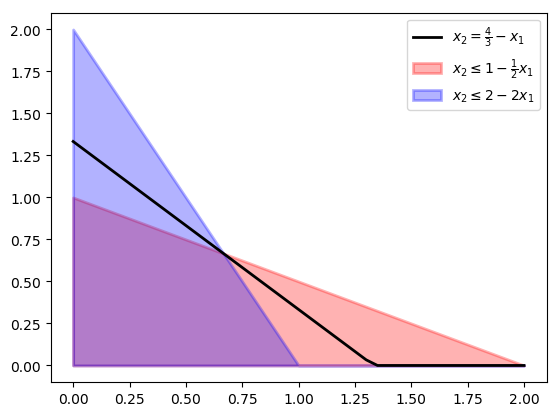

PyObject <matplotlib.legend.Legend object at 0x130805510>

In [14]:
#F. Rework items A and B if the objective function is x1+x2
#part A using guess
x1 = collect(0:0.05:2)
x2a = 1-0.5*x1
x2b = ifelse.(2-2*x1.>=0,2-2*x1,0)
x2c = ifelse.(4/3 -x1.>=0,4/3 - x1,0)


fig, ax = subplots()
ax[:fill_between](x1,x2a,color="red",linewidth=2,label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:fill_between](x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:plot](x1,x2c,color="black",linewidth=2,label=L"x_{2} = \frac{4}{3} - x_{1}",alpha=1)
ax[:legend](loc="upper right")

In [15]:
#part B using Julia
using JuMP
using GLPKMathProgInterface

myModel = Model(solver=GLPKSolverLP())
@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)
@constraint(myModel, 0.5*x1 + x2 <= 1)
@constraint(myModel, 2*x1 + x2 <= 2)
@objective(myModel, Max, x1 + x2)
myModel

Maximization problem with:
 * 2 linear constraints
 * 2 variables
Solver is GLPKInterfaceLP

In [16]:
@time begin
    status = solve(myModel)
end
println("Objective value: ", getobjectivevalue(myModel))
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))

  0.000335 seconds (75 allocations: 5.047 KiB)
Objective value: 1.3333333333333335
x1 = 0.6666666666666667
x2 = 0.6666666666666666
